<a href="https://colab.research.google.com/github/AmishiR/ML-Lab/blob/main/ML_Lab___09_Principal_Component_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Lab-09: Principal Component Analysis (PCA)**
Up to this point, we have been examining supervised learning algorithms or estimators — those that predict labels based on labeled training data. Now, we turn our attention to **unsupervised algorithms or estimators**, which can *reveal interesting patterns or structures* in the data without reference to any known labels.

In this lab we will explore what is perhaps one of the most broadly used unsupervised algorithms, principal component analysis (PCA).
PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, noise filtering, feature extraction and engineering, and much more.
After a brief conceptual discussion of the PCA algorithm, we will explore a couple examples of these further applications.

---

## **Objective**

The goal of this lab is to reduce a 3D dataset to 2D using Principal Component Analysis (PCA) while retaining the **maximum possible variance** in the data.

---

### **Learning Outcomes**

By the end of this lab, you will be able to:

- Understand **PCA** both **mathematically** and **geometrically**  
- Compute **PCA manually** using **NumPy**  
- Compare manual PCA results with the implementation in **`sklearn.decomposition.PCA`**  
- **Visualize** the dimensionality reduction and interpret the results  

---


## **Step-by-Step PCA using NumPy**

We will perform **Principal Component Analysis (PCA)** step-by-step using NumPy.  
The following steps will be performed:

1. **Load the input data**  
2. **Center the data / Standardize the data** (as required)  
3. **Compute the covariance matrix**  
4. **Perform eigen decomposition**  
5. **Sort eigenvalues and corresponding eigenvectors**  
6. **Compute the explained variance for each Principal Component (PC)**  
7. **Project the original data onto the PCA space**  
8. **Reconstruct the data from the selected Principal Components**  
9. **Visualize the reconstructed data**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# **Data Loading & 3D Visualization**

In [ ]:
# Load the data using pd.read_csv()
data =pd.read_csv('/content/Data_Lab_09.csv')

display(data.head())

,X,Y,Z
0,-0.306335,-1.899032,-2.539870
1,0.623503,1.356116,1.321773
2,0.670915,0.778486,2.915668
3,1.565431,3.208525,3.304426
4,-0.211010,1.374472,1.036008


In [ ]:
data.shape

(1000, 3)

In [ ]:
data.head(5)

,X,Y,Z
0,-0.306335,-1.899032,-2.539870
1,0.623503,1.356116,1.321773
2,0.670915,0.778486,2.915668
3,1.565431,3.208525,3.304426
4,-0.211010,1.374472,1.036008


/tmp/ipython-input-3663414556.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


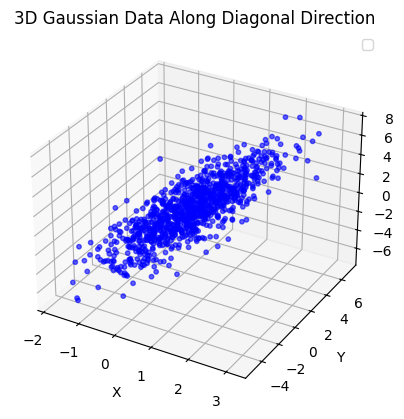

In [ ]:
# Visualize the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['X'], data['Y'], data['Z'], s=10, alpha=0.6, color ='blue')
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Gaussian Data Along Diagonal Direction')
plt.show()

In [ ]:
#Convert the pandas data frame into numpy array
X =np.array(data)

print("Shape of Original Data Matrix (X):\n", X.shape)
print("Original Data Matrix (X):\n", X)

Shape of Original Data Matrix (X):
 (1000, 3)
Original Data Matrix (X):
 [[-0.3063351  -1.89903202 -2.53986954]
 [ 0.62350338  1.35611636  1.32177258]
 [ 0.67091451  0.77848557  2.91566786]
 ...
 [-0.12192368 -2.09724017 -3.77951173]
 [ 0.84087282 -2.32028144 -3.42512568]
 [ 0.26416538  0.12262944  0.29020457]]


## **Step 2: Center the Data**
PCA requires the data to be **mean-centered**.

$$
X_{\text{centered}} = X - \mu
$$

This ensures the dataset has **zero mean**.


In [ ]:
# Step 2: Center the data / Standardize the data
# Centering: subtract the mean of each feature

X_mean =np.mean(X, axis=0)

X_centered =X-X_mean

print("\n Mean of each feature before data centering:\n", X.mean(axis=0))
print("\n Mean of each feature after data centering:\n", X_centered.mean(axis=0))
print("\n Centered Data Matrix:\n", X_centered)

# Note: If features have very different scales, standardize instead
# from sklearn.preprocessing import StandardScaler
# X_centered = StandardScaler().fit_transform(X)


 Mean of each feature before data centering:
 [0.4805887  0.81364075 0.47911541]

 Mean of each feature after data centering:
 [-3.19744231e-17  2.84217094e-17  2.84217094e-17]

 Centered Data Matrix:
 [[-0.7869238  -2.71267278 -3.01898495]
 [ 0.14291468  0.5424756   0.84265717]
 [ 0.19032581 -0.03515518  2.43655245]
 ...
 [-0.60251238 -2.91088092 -4.25862714]
 [ 0.36028412 -3.13392219 -3.90424109]
 [-0.21642332 -0.69101131 -0.18891084]]


## **Step 3: Covariance Matrix ($\Sigma$)**
The covariance matrix describes how features vary with each other.

$$
\Sigma = \frac{1}{m-1} X_{\text{centered}}^T X_{\text{centered}}
$$


In [ ]:
# Step 3: Compute the covariance matrix
cov_matrix = np.cov(X_centered,rowvar=False)

print("\n Covariance Matrix:\n", cov_matrix)
print("\n Shape of Covariance Matrix:\n", cov_matrix.shape)


 Covariance Matrix:
 [[0.57595639 1.09948683 1.25941621]
 [1.09948683 3.5954685  3.87681359]
 [1.25941621 3.87681359 4.74521806]]

 Shape of Covariance Matrix:
 (3, 3)


## **Step 4: Eigen Decomposition**
We compute eigenvalues and eigenvectors:

- **Eigenvectors** → Principal Components  
- **Eigenvalues** → Variance captured by each PC.
The eigenvectors of the covariance matrix give the **principal directions**,  
and the eigenvalues tell us how much variance is along each direction.


In [ ]:
# Step 4: Eigen Decomposition of Covariance Matrix
eigen_values, eigen_vectors =np.linalg.eigh(cov_matrix)

print("\nEigenvalues:\n", eigen_values)
print("\nEigenvectors (columns):\n", eigen_vectors)


Eigenvalues:
 [0.21795137 0.25395438 8.4447372 ]

Eigenvectors (columns):
 [[-0.93914575 -0.27352453 -0.20782103]
 [ 0.3420572  -0.68885578 -0.63912016]
 [-0.03165632  0.67131367 -0.74049702]]


## **Step 5: Sort Eigenvalues & Eigenvectors**
We sort in **descending order** of variance explained.
We sort eigenvalues in descending order because PCA keeps the components  
that capture the most variance first.


In [ ]:
# Step 5: Sort Eigenvalues and Eigenvectors in descending order
sorted_idx =np.argsort(eigen_values)[::-1]

eigvals_sorted =eigen_values[sorted_idx]
eigvecs_sorted =eigen_vectors[:,sorted_idx]

print("\n Sorted Eigenvalues:\n", eigvals_sorted)
print("\n Sorted Eigenvectors:\n", eigvecs_sorted)


 Sorted Eigenvalues:
 [8.4447372  0.25395438 0.21795137]

 Sorted Eigenvectors:
 [[-0.20782103 -0.27352453 -0.93914575]
 [-0.63912016 -0.68885578  0.3420572 ]
 [-0.74049702  0.67131367 -0.03165632]]


## **Step 6: Explained Variance**
The fraction of total variance explained by each PC is:

$$
\text{Explained Variance Ratio}_i = \frac{\lambda_i}{\sum_j \lambda_j}
$$

We visualize variance captured by each PC using plots.


Explained Variance Ratio:
 [0.94707585 0.02848094 0.02444321]


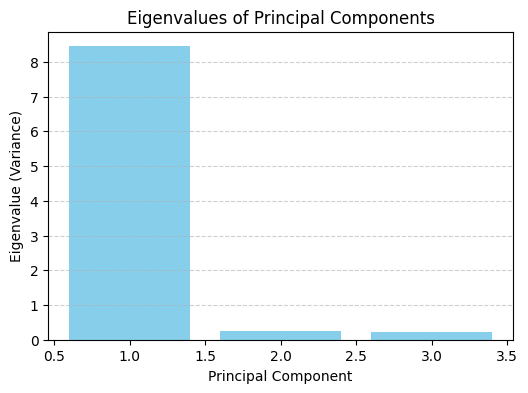

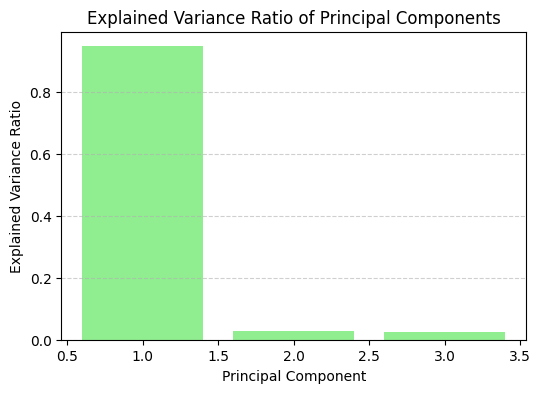

In [ ]:
# Step 6: Compute Explained Variance
explained_variance =eigvals_sorted/eigvals_sorted.sum()

print("\nExplained Variance Ratio:\n", explained_variance)

# Bar plot of eigen values
plt.figure(figsize=(6,4))
plt.bar(range(1, len(eigvals_sorted)+1), eigvals_sorted, color='skyblue')
plt.title("Eigenvalues of Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue (Variance)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Bar plot of explained variance ratios
plt.figure(figsize=(6,4))
plt.bar(range(1, len(explained_variance)+1), explained_variance, color='lightgreen')
plt.title("Explained Variance Ratio of Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

## **Cumulative Explained Variance**

The cumulative explained variance plot helps us decide **how many PCs to keep**.  
Look for the "elbow point" — where adding more PCs gives little extra variance.

The plot shows how much total variance is captured as we add more principal components.

- The curve increases as we add more PCs.  
- The **elbow point** is where the curve flattens — beyond this, adding more PCs gives little gain.  
- Often we keep enough PCs to explain at least **90% of the variance** (red dashed line in the plot).  


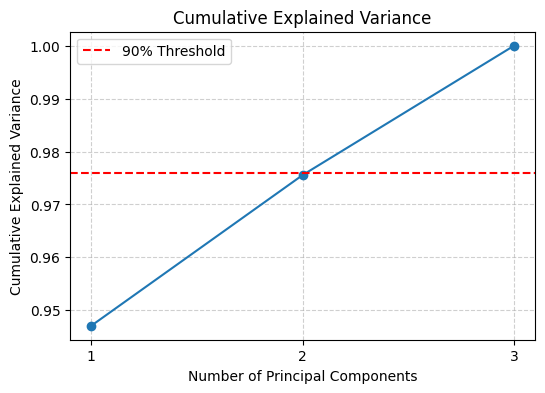

Cumulative Explained Variance: [0.94707585 0.97555679 1.        ]


In [ ]:
# Cumulative Explained Variance

cumulative_variance =np.cumsum(explained_variance)

plt.figure(figsize=(6,4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='-')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.xticks(range(1, len(cumulative_variance)+1))
plt.grid(True, linestyle="--", alpha=0.6)
plt.axhline(y=0.976, color='r', linestyle='--', label="90% Threshold")
plt.legend()
plt.show()
print("Cumulative Explained Variance:", cumulative_variance)

## **Step 7: Projection**
We can reduce dimensions by projecting onto the top **k** PCs.

$$
X_{\text{pca}} = X_{\text{centered}} V_k
$$

By projecting onto the first **k=2** PCs, we compress data from 3D → 2D  
while retaining most of the variance.

In [ ]:
# Step 7: Project the Original Data onto Principal Components (PCA space)
# Example: Project onto first 2 PCs

k =2              # choose top 2 principal components
# select top-k eigenvectors and form the projection matrix
V =eigvecs_sorted[:,0:k]
X_pca =X_centered@V


print("\nData projected onto first 2 Principal Components:\n", X_pca)


Data projected onto first 2 Principal Components:
 [[ 4.13281254  0.05719744]
 [-1.00039289  0.15290914]
 [-1.82134515  1.60784903]
 ...
 [ 5.13911814 -0.68889553]
 [ 4.81915714 -0.56069652]
 [ 0.6265045   0.4083858 ]]


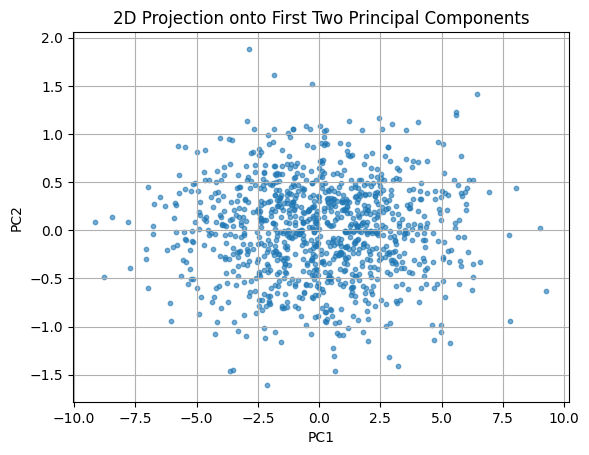

In [ ]:
# Visualization of projected (2D) data
plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], s=10, alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Projection onto First Two Principal Components')
plt.grid(True)
plt.show()

## **Step 8: Reconstruction**
We can reconstruct an approximation of the data from PCA:

$$
X_{\text{reconstructed}} = X_{\text{pca}} V_k^T + \mu
$$

- If k = all components → perfect reconstruction  
- If k < all components → approximation  
If we keep fewer PCs, the reconstruction is approximate.  
The more PCs we use, the closer the reconstruction is to the original dataset.

In [ ]:
# Step 8: Reconstruct the data (approximation using top k components)

X_reconstructed =X_pca@V.T+X_mean

print("\nReconstructed Data (using first 2 PCs):\n", X_reconstructed)

# Optional: Reconstruction error (MSE)

reconstruction_error =np.mean((X_reconstructed-X)**2)

print("\nMean Squared Reconstruction Error:", reconstruction_error)


Reconstructed Data (using first 2 PCs):
 [[-0.39394157 -1.86712385 -2.54282254]
 [ 0.64666698  1.34767967  1.32255337]
 [ 0.41931638  0.87012306  2.9071871 ]
 ...
 [-0.39899831 -1.99632359 -3.78885124]
 [-0.36756926 -1.88014069 -3.46585933]
 [ 0.23868435  0.13191018  0.28934567]]

Mean Squared Reconstruction Error: 0.07257780488374473


In [ ]:
# Compare original and reconstructed
print("Original shape:", X.shape)
print("Reconstructed shape:", X_reconstructed.shape)

Original shape: (1000, 3)
Reconstructed shape: (1000, 3)


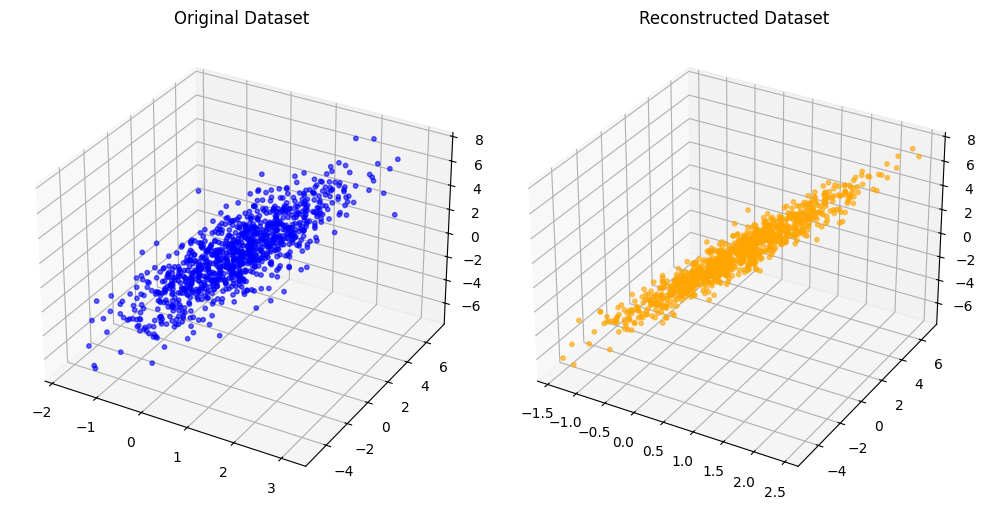

In [ ]:
# Visualization of projected (3D) data along with the Original Data
fig = plt.figure(figsize=(10, 5))
# First subplot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], s=10, alpha=0.6, color='blue')
ax1.set_title('Original Dataset')
# Second subplot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], X_reconstructed[:, 2], s=10, alpha=0.6, color='orange')
ax2.set_title('Reconstructed Dataset')
plt.tight_layout()
plt.show()

## **Step 9: Sklearn PCA Comparison**

We will now use **scikit-learn's PCA** to confirm our manual results.  

- The explained variance ratios from sklearn should match our manual computation.  
- The principal components (eigenvectors) may differ in **sign**, which is normal in PCA  
  (since both $v$ and $-v$ are valid eigenvectors).  
- The projected data (first 2 PCs) should closely match our manual $X_{\text{pca}}$ values.  


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)                # choose 2 components (n_components=2) for comparison
X_pca_sklearn =pca.fit_transform(X)

print("Sklearn PCA - Explained Variance Ratio:\n", pca.explained_variance_ratio_)
print("\nSklearn PCA - Principal Components (Eigenvectors):\n", pca.components_)
print("\nData projected using Sklearn PCA:\n", X_pca_sklearn)

# Compare with our manual projection
print("\nManual PCA Projection (first 5 rows):\n", X_pca[:5])
print("\nSklearn PCA Projection (first 5 rows):\n", X_pca_sklearn[:5])

Sklearn PCA - Explained Variance Ratio:
 [0.94707585 0.02848094]

Sklearn PCA - Principal Components (Eigenvectors):
 [[ 0.20782103  0.63912016  0.74049702]
 [ 0.27352453  0.68885578 -0.67131367]]

Data projected using Sklearn PCA:
 [[-4.13281254 -0.05719744]
 [ 1.00039289 -0.15290914]
 [ 1.82134515 -1.60784903]
 ...
 [-5.13911814  0.68889553]
 [-4.81915714  0.56069652]
 [-0.6265045  -0.4083858 ]]

Manual PCA Projection (first 5 rows):
 [[ 4.13281254  0.05719744]
 [-1.00039289  0.15290914]
 [-1.82134515  1.60784903]
 [-3.84820594 -0.04979075]
 [-0.62708668  0.17668677]]

Sklearn PCA Projection (first 5 rows):
 [[-4.13281254 -0.05719744]
 [ 1.00039289 -0.15290914]
 [ 1.82134515 -1.60784903]
 [ 3.84820594  0.04979075]
 [ 0.62708668 -0.17668677]]


# ***PCA Results — Summary***

From our PCA analysis:

- The **eigenvalues** tell us how much variance is captured by each principal component (PC).
- The **explained variance ratio** shows the percentage of total variance explained by each PC.
- The **first principal component (PC1)** captures the largest share of the variance.
- The **second principal component (PC2)** captures the next largest portion.
- Together, PC1 and PC2 usually explain most of the important information in the dataset.

### Key Insights:
1. **Dimensionality Reduction**  
   - Instead of keeping all original features, we can project data onto the first 1–2 PCs and still retain most of the variance.  
   - This makes the data easier to visualize and process without losing much information.

2. **Reconstruction**  
   - Using only the top PCs, we reconstructed the dataset.  
   - The reconstruction was not perfect (since we dropped some components), but it was close.  
   - The reconstruction error tells us how much information was lost.

3. **Choosing Number of Components (k)**  
   - Look at the explained variance ratios (or cumulative variance).  
   - Choose \(k\) such that the cumulative variance explained is at least **90–95%**.  
   - This balances information retention and dimensionality reduction.

---

👉 **In practice:**  
- PCA is widely used for **data compression**, **noise reduction**, and **visualization**.  
- Always **scale/standardize data** before PCA if features are on different scales.  


# **PCA for Visualization: Handwritten Digits**

The usefulness of dimensionality reduction may not be entirely apparent in only two dimensions, but it becomes clear when looking at high-dimensional data. To see this, let's take a quick look at the application of PCA to the handwritten digits dataset.

In [ ]:
#load the dataset
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape

(1797, 64)

Recall that the digits dataset consists of 8 × 8–pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them into a more manageable number of dimensions, say two:

In [ ]:
pca =PCA(n_components=2)     # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)

print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data, as seen in the following figure:

/tmp/ipython-input-2943749715.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('rainbow', 10))


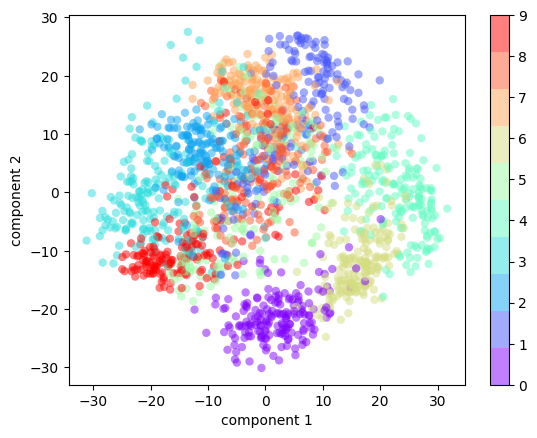

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the data in two dimensions, and we have done this in an unsupervised manner—that is, without reference to the labels.

### What Do the Components Mean?

We can go a bit further here, and begin to ask what the reduced dimensions *mean*.
This meaning can be understood in terms of combinations of basis vectors.
For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

One way we can think about this is in terms of a pixel basis.
That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

One way we might imagine reducing the dimensionality of this data is to zero out all but a few of these basis vectors.
For example, if we use only the first eight pixels, we get an eight-dimensional projection of the data (the following figure). However, it is not very reflective of the whole image: we've thrown out nearly 90% of the pixels!

<p align="center">
  <figure>
    <img src="https://drive.google.com/uc?export=view&id=1JFBG9oq-k_upxL6CdoT9rl0177-AePS_"
         alt="Reconstructing the same digit using the mean plus the first eight PCA basis functions." width="1150" height="150">
    <figcaption><b>Figure:</b>  Reconstructing the same digit image by multiply each element of the vector by the pixel it describes, and then add the results together to build the image:</figcaption>
  </figure>
</p>

The upper row of panels shows the individual pixels, and the lower row shows the cumulative contribution of these pixels to the construction of the image.
Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image.
Were we to continue this sequence and use all 64 pixels, we would recover the original image.

But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some predefined contribution from each pixel, and write something like:

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$
PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset.
The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series.
the following figure shows a similar depiction of reconstructing the same digit using the mean plus the first eight PCA basis functions.

<p align="center">
  <figure>
    <img src="https://drive.google.com/uc?export=view&id=1Qjbwxtgr1r3dSyhtm32ub87f5PolWIg7"
         alt="Reconstructing the same digit using the mean plus the first eight PCA basis functions." width="1150" height="150">
    <figcaption><b>Figure:</b> Reconstructing the same digit using the mean plus the first eight PCA basis functions.</figcaption>
  </figure>
</p>

Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean, plus eight components! The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example. This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel basis of the input data.

### Choosing the Number of Components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components (see the following figure):

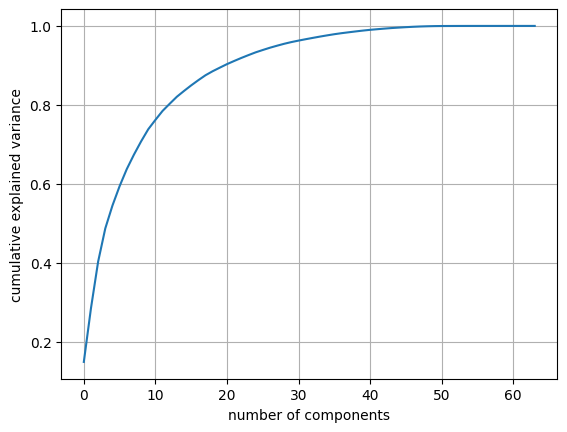

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid('on')

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits data the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

This tells us that our 2-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in its features.

# **PCA as Noise Filtering**
PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data. First we will plot several of the input noise-free data:

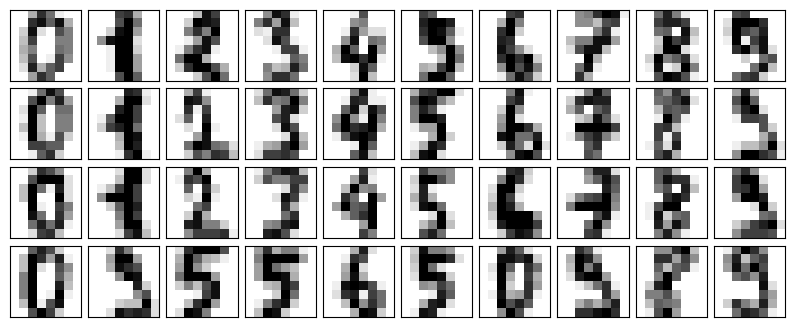

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Now lets add some random noise to create a noisy dataset, and re-plot it:

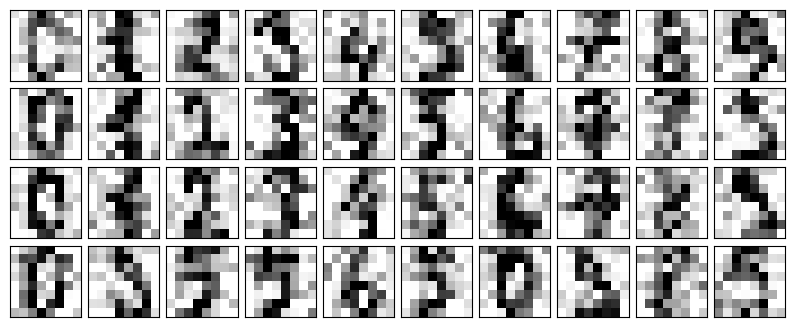

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels. Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [ ]:
pca = PCA(0.50).fit(noisy)
print (pca.n_components_)

12


Here 50% of the variance amounts to 12 principal components. Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

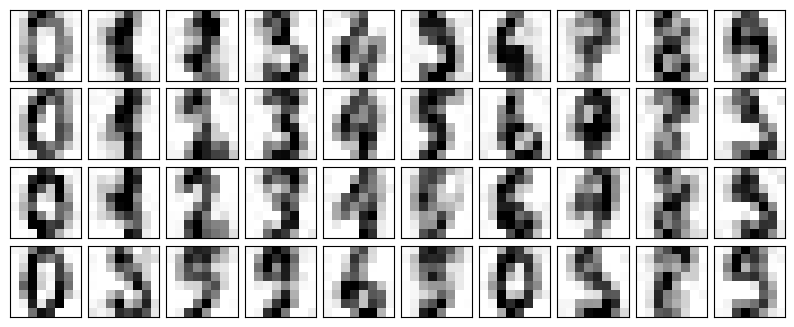

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

# **Conceptual Understanding Questions**

### <font color="darkblue"><b>1. Why PCA?</b></font>
- Explain why PCA is useful for dimensionality reduction.  
- In what scenarios might PCA perform poorly?

### <font color="darkblue"><b>2. Covariance Matrix</b></font>  
- Why do we use the covariance (or correlation) matrix in PCA?  
- What does it mean if two variables have high covariance in the context of PCA?

### <font color="darkblue"><b>3. Standardization Issue</b></font>
- Why is it often necessary to standardize features before applying PCA?  
- Give an example where skipping standardization would mislead PCA results.

### <font color="darkblue"><b>4. Orthogonality</b></font>
- Why are principal components always orthogonal to each other?  
- How does orthogonality help in interpreting PCA results?

### <font color="darkblue"><b>5. Limitations</b></font>  
- PCA is a linear method. Give an example where PCA may not capture important structure in the data.  
- Suggest an alternative to PCA when data relationships are nonlinear.

---

## **Computation-Oriented Questions**

### <font color="darkblue"><b>1. Cumulative Variance Table</b></font>
- Given a set of eigenvalues, build a table showing variance explained by each component and cumulative variance.  
  *Ask:* “At which component do we cross 80% or 90%?”

### <font color="darkblue"><b>2. Reconstruction Error</b></font>  
- If you retain only the first *k* principal components, what fraction of the variance is lost?  
- **Example:** If total variance = 100 and you keep 85, what is the reconstruction error?

### <font color="darkblue"><b>3. Number of PCs Formula</b></font>
- Write the formula to compute the percentage variance explained by the first *k* components.  
- Apply it to a dataset with given eigenvalues.

### <font color="darkblue"><b>4. Transforming Data</b></font>
- Given a data matrix **X** and eigenvectors **V**, show how to compute the new coordinates (principal component scores).  
- Compute the first PC score for a small 2D dataset (2×2 example).

### <font color="darkblue"><b>5. 2D Case Visualization</b></font>  
- Given 2D points, sketch how PCA finds the first principal component.  
- Identify which axis (x or y or diagonal) would be chosen as PC1.

## **Interpretation / Practical Questions**

### <font color="darkblue"><b>1. Choosing Between Accuracy vs Efficiency</b></font>
- If keeping 95% variance requires 5 PCs but 90% variance requires only 2 PCs, which would you choose for real-time applications? Why?

### <font color="darkblue"><b>2. Feature Contribution</b></font>  
- If PC1 = 0.7x₁ + 0.7x₂, how do you interpret the contribution of features x₁ and x₂?

### <font color="darkblue"><b>3. High-Dimensional Data</b></font>  
- Why is PCA especially useful in high-dimensional settings (e.g., gene expression data with 20,000 features)?

### <font color="darkblue"><b>4. Outlier Sensitivity</b></font>
- How do outliers affect PCA?  
- Suggest a modification/alternative method that is more robust.

### <font color="darkblue"><b>5. Applications</b></font>  
- Name two real-world applications of PCA in:
  - (a) Image Procsessing
  - (b) Finance  
  - (c) Healthcare

